__AIC__ 
Assume we have a RP-tree $(T_m)$ on quantifying continuous variables $x$ and the $T_m$ has $k$ leaves (bins). For each leaf $i \in \{1,2,\dots,k\}$, the negative loglikelihood can be defined as:
$$
L_i = -n_1^{(i)} \log\frac{n_1^{(i)}}{n^{(i)}} - n_0^{(i)} \log\frac{n_0^{(i)}}{n^{(i)}} \enspace.
$$,
where $n^{(i)} = n_0^{(i)} + n_1^{(i)}$

The AIC of $T_m$ can be computed by adding number of bins $k$:
$$AIC(T_m) = \sum_1^{k} L_i + k$$

__Averaging the models__
Suppose we have an estimator $\theta^{(k)}$ to control the number of bins $k$. Given a single RP-tree $(T_m)$, we have y distribution $p(y|\theta^{(m)})$. If we think about the overall y distirbution on whole data, it will be a mixture model of different RP-trees (eg.$\{p(y|\theta^{(1)}), p(y|\theta^{(2)}), \dots, p(y|\theta^{(k)})\}$).
$$
P(y) = \sum_i^k w_i p(y|\theta^{(i)}) \enspace.
$$,
where $w_i \propto e^{-AIC(T_m)}, \sum w_i = 1$. However, we don't know how to do that efficiently. Instead, we may approximate the estimation by averaging $p(y)$ in all given RP-trees.
$$
P(y) = \sum_i^k w_i p(y|T_m) \enspace.
$$

In [5]:
# from greedyFunc import CutPointIndividual
import statistics as st
import math
import numpy as np
from os import listdir
from os.path import isfile, join
import pandas as pd
def read_file(mypath):
    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    sublist = []
    for each in onlyfiles:
        sub = pd.read_csv(mypath + each)
        sub.columns=['X1', 'X2', 'X3', 'X4', 'Y'] 
        sublist.append(sub)

    df = pd.concat(sublist)
    df = df[['X1', 'X2', 'Y']]
    return df

In [2]:
mypath = listdir('data/sampledNonLinData/2/2/2-2-0.45832/')
all_files = [read_file('data/sampledNonLinData/2/2/2-2-0.45832/' + each + '/') for each in mypath]
all_files = [(each.shape, each) for each in all_files]
all_files.sort()
all_files = [each[1] for each in all_files]


df = all_files[1]
df

,X1,X2,Y
0,-0.234980,0.747260,1
1,-0.342830,0.060417,1
2,-0.146550,-0.446180,1
3,-0.436290,-0.374580,1
4,-0.656060,0.920020,1
...,...,...,...
34,0.000044,-0.103630,1
35,0.750270,-0.664030,1
36,0.233680,-0.643700,1
37,-0.848080,0.681250,1


In [3]:
# For new individual terms
from Stepwise import *

In [4]:
all_result = {}
for df in all_files:
    if df.shape[0] > 100000:
        print('Stop')
    print('Start: ' , df.shape[0])
    final_fmi, bins_num = Stepwise(df.values, m=0, current=None, candi_fmi=0, stop_indx=df.shape[1] -1)
    if bins_num not in all_result:
        all_result[bins_num] = [final_fmi]
    else:
        all_result[bins_num] += [final_fmi]
    print('Finished')
    

Start:  950
Finished
Start:  1950
Finished
Start:  3950
Finished
Start:  7950
Finished
Start:  15950
Finished
Start:  31950


KeyboardInterrupt: 

In [ ]:
950, 1950, 3950, 7950, 15950, 31950

In [5]:
# import pickle

# with open('Base_Line_2_step_wise_only_Relevant_Variables_.p', 'wb') as fp:
#     pickle.dump(all_result, fp, protocol=pickle.HIGHEST_PROTOCOL)

In [9]:
import pickle

with open('Base_Line_2_step_wise_only_Relevant_Variables_.p', 'rb') as fp:
    all_result = pickle.load(fp)

In [10]:
all_result

{109: [0.23831350969405118],
 154: [0.18619479075120982],
 204: [0.17519501298058504],
 196: [0.1567210809957471],
 256: [0.16670286601608542]}

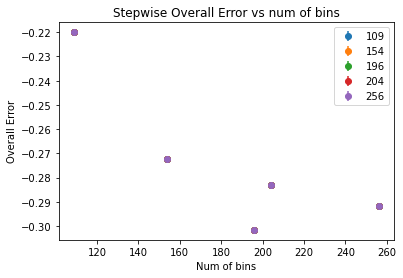

In [7]:
import pandas as pd
bias_lst = [np.mean(all_result[key])-0.45832 for key in all_result]
std_lst = [np.std(all_result[key]) for key in all_result]
summ = pd.DataFrame({'Mean': bias_lst, 'std': std_lst})
summ.index = list(all_result.keys())
summ
import matplotlib.pyplot as plt
width = 0.35
num_reps = 1
summ = summ.sort_index()
ind = summ.index
y = summ[f'Mean']
yerr = summ[f'std'].values
# plt.scatter(ind, summ[f'Mean'])
for key in summ.index:
    plt.errorbar(ind, y, yerr=yerr, fmt='o', label=str(key))
    
plt.legend()
plt.title('Stepwise Overall Error vs num of bins')
plt.xlabel('Num of bins')
plt.ylabel('Overall Error')
plt.show()

In [8]:
all_result

{109: [0.23831350969405118],
 154: [0.18619479075120982],
 204: [0.17519501298058504],
 196: [0.1567210809957471],
 256: [0.16670286601608542]}

In [11]:
# combine

import pickle

with open('RP_tree_1_only_Relevant_Variables_.p', 'rb') as fp:
    result_dic_rp = pickle.load(fp)

In [17]:
with open('base_line1_KD_Tree_only_Relevant_Variables.p', 'rb') as fp:
    result_dic_kd = pickle.load(fp)

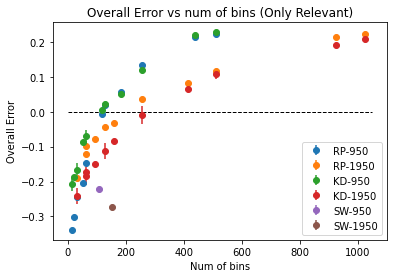

In [46]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

def bias_std(dic):
    """
    dic = result_dic[key]
    """
    bias_lst = [np.mean(dic[key])-0.45832 for key in dic]
    std_lst = [np.std(dic[key]) for key in dic]
    summ = pd.DataFrame({'Mean': bias_lst, 'std': std_lst})
    summ.index = list(dic.keys())
    return summ


fig, ax11 = plt.subplots(sharex=True, sharey=False)
ax11.set_xlabel('Num of bins')
ax11.set_title('Overall Errors with only relevant variables')
ax11.set_ylabel('Overall Errors')
for key in result_dic_rp:
    summ = bias_std(result_dic_rp[key][0])
    summ = summ.sort_index()
    ind = summ.index
    y = summ[f'Mean']
    yerr = summ[f'std'].values
    ax11.errorbar(ind, y, yerr=yerr, fmt='o', label='RP-' + str(key))

for key in result_dic_rp:
    summ = bias_std(result_dic_kd[key][0])
    summ = summ.sort_index()
    ind = summ.index
    y = summ[f'Mean']
    yerr = summ[f'std'].values
    ax11.errorbar(ind, y, yerr=yerr, fmt='o', label='KD-' + str(key))

    
bias_lst = [np.mean(all_result[key])-0.45832 for key in all_result]
std_lst = [np.std(all_result[key]) for key in all_result]
summ = pd.DataFrame({'Mean': bias_lst, 'std': std_lst})
summ.index = list(all_result.keys())
summ

width = 0.35
num_reps = 1
summ = summ.sort_index()
ind = summ.index
y = summ[f'Mean']
yerr = summ[f'std'].values
# plt.scatter(ind, summ[f'Mean'])
val = [950, 1950]
for i in range(len(val)):
    plt.errorbar(ind[i], y.values[i], yerr=yerr[i], fmt='o', label='SW-'+str(val[i]))
    
plt.legend()
plt.title('Overall Error vs num of bins (Only Relevant)')
plt.xlabel('Num of bins')
plt.ylabel('Overall Error')

ax11.hlines(0, xmin=0, xmax=1050, color='k', linestyle='dashed', linewidth=1)
ax11.legend()
plt.show()

In [33]:
ind

Int64Index([109, 154, 196, 204, 256], dtype='int64')

In [43]:
y.values

array([-0.22000649, -0.27212521, -0.30159892, -0.28312499, -0.29161713])

In [47]:
a = [1,2,3,4,5,4]
np.unique(a, return_counts = True)

(array([1, 2, 3, 4, 5]), array([1, 1, 1, 2, 1]))